# 线性回归(单变量)

在接触机器学习后，第一个碰到的模型应该就是线性回归了。线性回归属于<b>监督学习</b>中的<b>回归模型</b>。

开始试验前，先引入必要的python包：

In [50]:
%matplotlib inline
# 让python2的除法保留小数
from __future__ import division
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
# seaborn让matplotlib作图更好看
import seaborn as sns
# 符号计算，可用于计算微积分等让人头痛的数学表达式
from sympy import *
sympy.init_printing()

其实线性回归还是比较直观和常见的，在生活中我们也经常遇到，比方有下面的数据，（数据来自NG视频的第一次作业）：

> 假设你是一家餐馆的CEO，并正在考虑不同的城市开设一个新的分店。现在根据城市人口和利润的一些历史数据：

In [29]:
# 数据总共两列，分别让人口为x、利润为y吧。
ex1_data1 = pd.read_csv('../data/ex1data1.txt',names=['x','y'])
# 看看前5行
ex1_data1[:5]

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


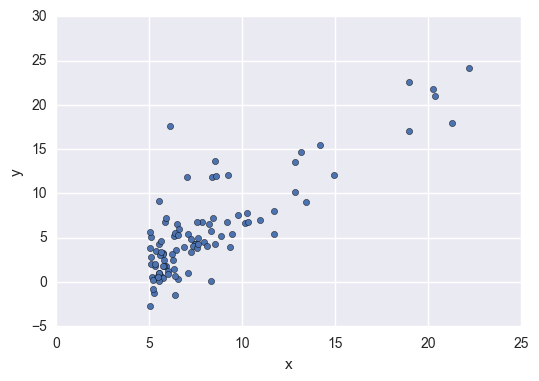

In [44]:
# 用matplotlib把散点图做出来，这样更加直观一些：
plot = ex1_data1.plot(x='x',y='y',kind='scatter',legend=True)

从图上可以看出什么来？

嗯，利润y貌似是和人口x存在某种关系的，我们甚至大致想象出一根直线来大致标注出这些点之间的关系。

现在我们假设一根线,经过（5，2）（23，23）两个点：

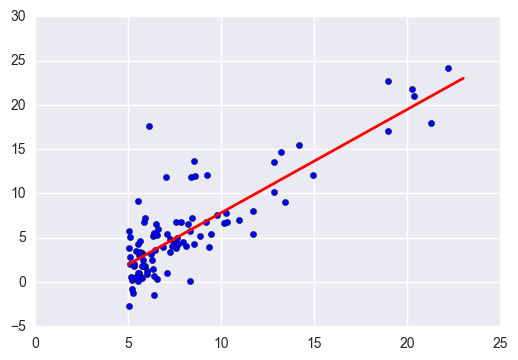

In [45]:
plt.scatter(ex1_data1['x'], ex1_data1['y'])
plt.plot([5,23], [2,23], color='red',linewidth=2)
plt.show()

嗯，还不错，但是我们这样做的是对的吗？我们拍脑袋定下的（5，2）（23，23）这两个点是否是合适的？怎么来评估这个模型？

其实，不借助机器学习，以往我们通过可视化工具，对数据维度不高、数据量不大的数据，可以拍脑袋做一些分析决策。但是这样并不科学，我们要让我们选择的模型更具备说服力，就要用更加科学的手段来验证我们的模型，而不是拍脑袋。

我们需要设立一个标准。那就是，我们的预测，和实际样本差最小。
 
还记得直线的表达式吧：

In [69]:
theta0,theta1,x = symbols('theta_0,theta_1,x')
h = Function('h(x)')
# 我们的线性模型
Eq(h,theta0 + theta1 * x)

那么h(x)预测函数（hypothesis）实际上就是我们的预测函数，它受到参数θ的影响。